In [5]:
#imports
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps

import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from our_package import * #allows us to use our functions directly

In [4]:
#we call the different functions
T = 5
Lambda = 1

D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T, a, b)
Y = Computation_Y(T, Lambda)
x,x_tilde = ComputeArgmax(T,Lambda, Y)
mu,mu_tilde = ComputeMeans(T,Lambda, Y)
q1 = ComputeQuantiles(T,Lambda,0.975*np.ones(T), Y)
q2 = ComputeQuantiles(T,Lambda,0.025*np.ones(T), Y)
med = ComputeQuantiles(T,Lambda,0.5*np.ones(T), Y)
sim_theta,sim_theta_tilde,sim_accepts,sim_gammas = MetropolisHastings(T,Lambda, Y)
Mean=np.sum(sim_theta,axis=0)/sim_theta.shape[0]
q = np.array([2.5,50,97.5])
quantiles_emp = Quantiles(sim_theta_tilde, q,T)

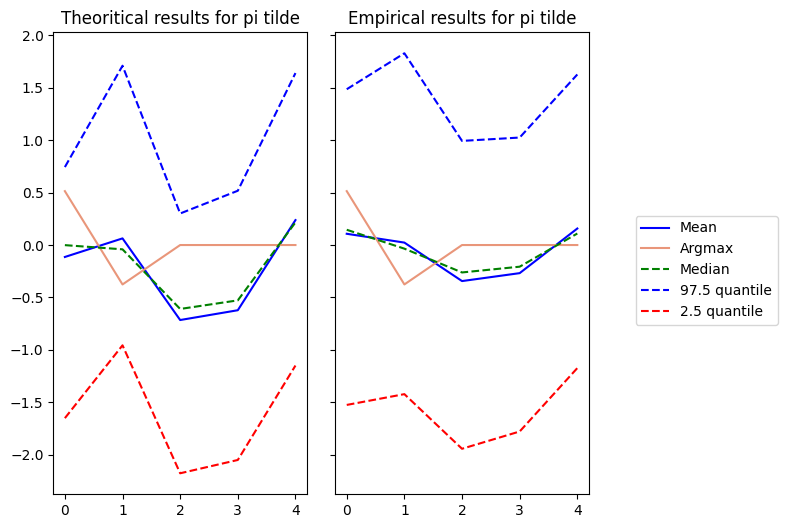

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6), sharey=True)
#Plot of theoritical results
axes[0].plot(mu_tilde,color="blue",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("Theoritical results for pi tilde")


#Plot of empirical results
axes[1].plot(D@Mean,color="blue")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp[1],'g--')
axes[1].plot(quantiles_emp[2],'b--')
axes[1].plot(quantiles_emp[0],'r--')
axes[1].set_title("Empirical results for pi tilde")

# Shrink current axis by 20%
box0,box1 = axes[0].get_position(),axes[1].get_position()
axes[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
axes[1].set_position([box1.x0*0.8, box1.y0, box1.width * 0.8, box1.height])
fig.legend(loc=(0.8*box1.x0+box1.width,box1.height/2))
plt.show()

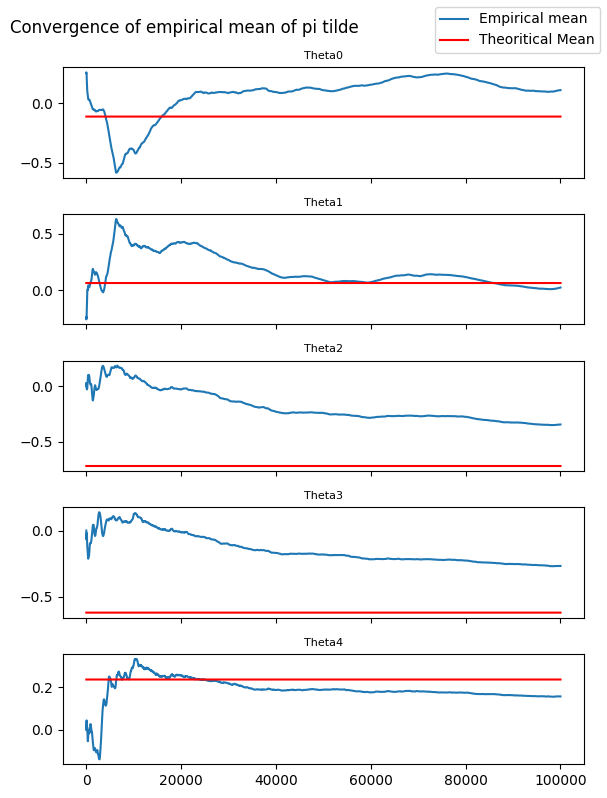

In [13]:
#Convergence plot of the mean of theta_tilde
nb_iter=sim_theta.shape[0]
x=np.linspace(1,nb_iter,nb_iter)
mean_tab=np.cumsum(sim_theta_tilde,axis=0)

fig,Axes = plt.subplots(T,1,figsize=(6,8),sharex=True)
for i in range(T):
    ax = Axes[i]
    res=mean_tab[:,i]/x
    ax.plot(x,res,label="Empirical mean" if i==0 else "")
    ax.plot(x,mu_tilde[i]*np.ones(nb_iter),'r',label="Theoritical Mean" if i==0 else "")
    ax.set_title(f"Theta{i}",fontsize=8)

fig.suptitle("Convergence of empirical mean of pi tilde", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

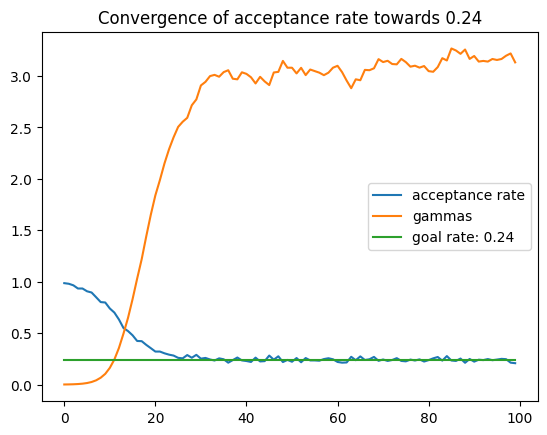

In [18]:
plt.plot(sim_accepts,label="acceptance rate")
plt.plot(sim_gammas[:-1],label="gammas")
plt.plot(np.ones(len(sim_accepts))*0.24,label="goal rate: 0.24")
plt.title("Convergence of acceptance rate towards 0.24")
plt.legend()
plt.show()

In [ ]:
Lambdas = [0.1,0.5,0.8,1,1.3,1.6,2,4,7,9]
n = len(Lambdas)
niter = 1e7 #1e7 #from paper
T = 1
x = np.arange(1,niter+2)
x = x[:,np.newaxis]

approx = np.zeros((int(niter)+1,T,n))
theoretical = np.zeros((T,n))

for k in range(n):
    L = Lambdas[k]
    Y = Computation_Y(T, L) #same Y allows us to evaluate the algorithm
    mu,mu_tilde = ComputeMeans(T, L, Y)
    theoretical[:,k] = mu_tilde
    sim_theta, sim_theta_tilde, *_ = MetropolisHastings(T, L, Y, niter=niter, save=False) #simulate theta efficiently
    res = np.cumsum(sim_theta_tilde,axis=0)
    res /= x #convergence vector
    approx[:,:,k] += res
    print(f"finished {k} iteration") 

(10001, 10) (10001, 10)


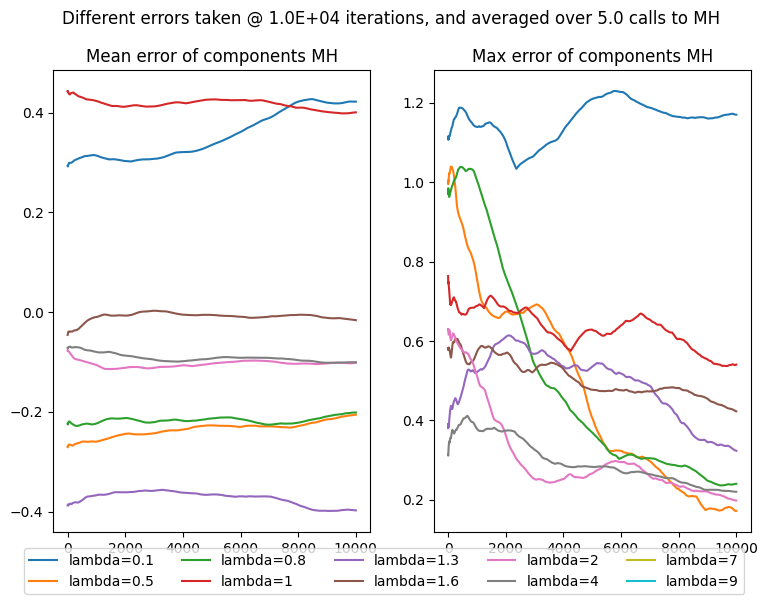

In [28]:
mean_error = approx - theoretical[np.newaxis,:,:]
max_error = np.max(mean_error,axis=1)
mean_error = np.mean(mean_error,axis=1)
print(np.shape(mean_error),np.shape(max_error))
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,6))
fig.suptitle(f"Different errors taken @ {niter:.1E} iterations, and averaged over {nb_mean:.1f} calls to MH")
ax1.set_title("Mean error of components MH")
ax2.set_title("Max error of components MH")
for k in range(n):
    ax1.plot(mean_error[:,k])
    ax2.plot(max_error[:,k], label=f"lambda={Lambdas[k]}")
fig.legend(ncols=n//2,loc="lower center")
plt.show()

abs error: [-0.34176151 -2.56079064  1.34601757  0.19194592 -0.30205551         nan
         nan]


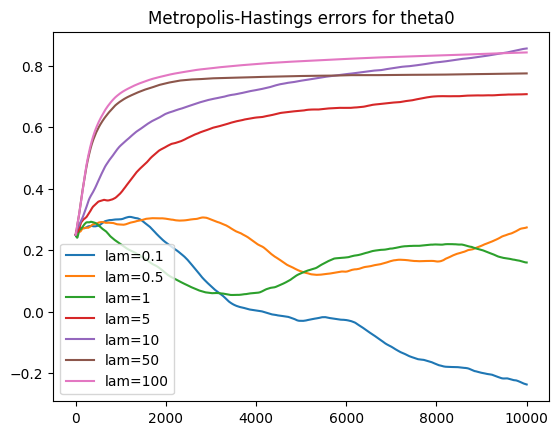

abs error: [-0.70917327 -2.07854352  0.4942806   0.27041349         nan         nan
         nan]


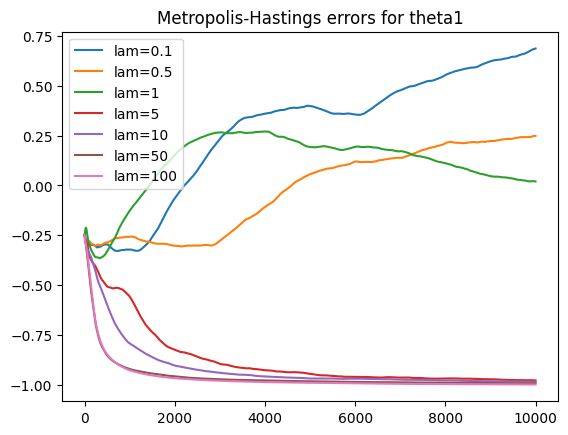

abs error: [-0.07782493 -0.34903415  0.67017105 -0.05501223         nan         nan
         nan]


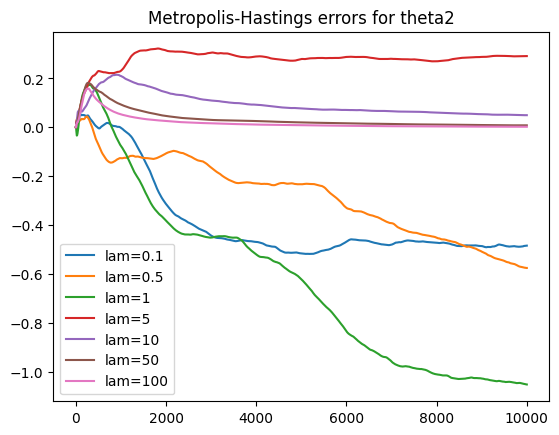

abs error: [0.04570683 0.20720447 0.03624119 0.19882571 0.27187233        nan
        nan]


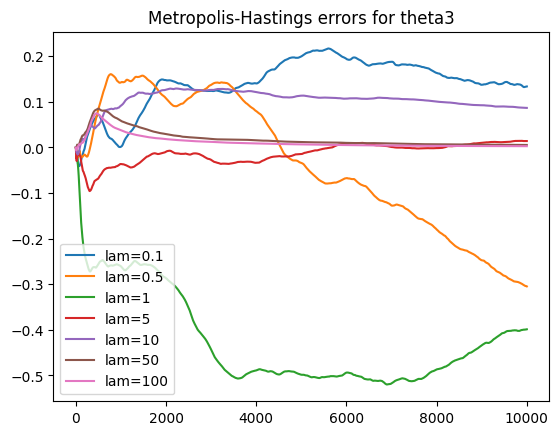

abs error: [ 0.56132433  0.19802904 -1.4934783  -0.06720122         nan         nan
         nan]


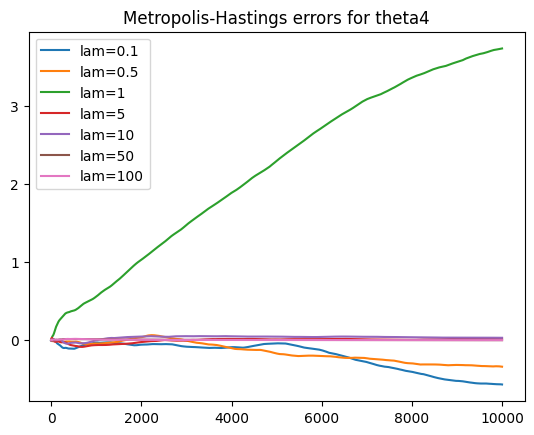

In [72]:
for t in range(T):
    fig = plt.figure(t)
    for i in range(n):
        plt.plot(errors[:,t,i],label=f"lam={Lambdas[i]}")
    print(f"abs error: {errors[-1,t,:]-theoretical_means[t,:]}")
    plt.title(f"Metropolis-Hastings errors for theta{t}")
    plt.legend()
    plt.show()

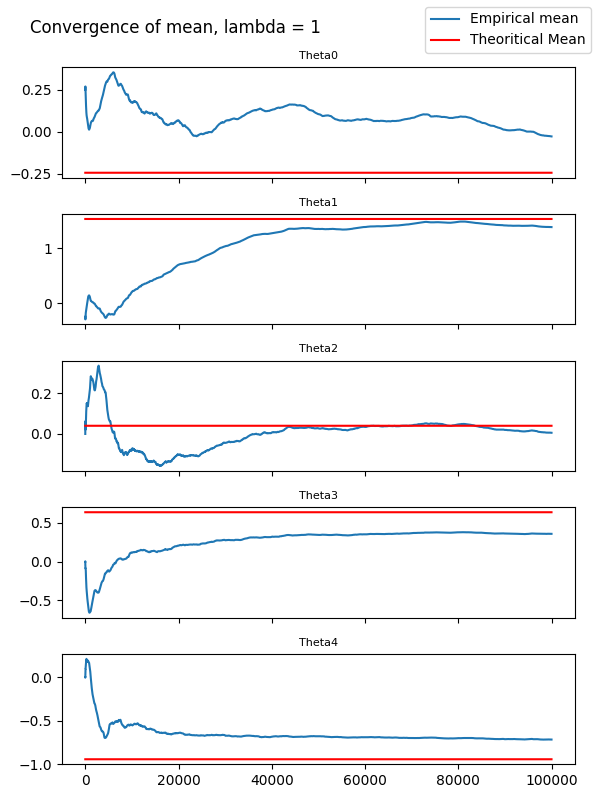

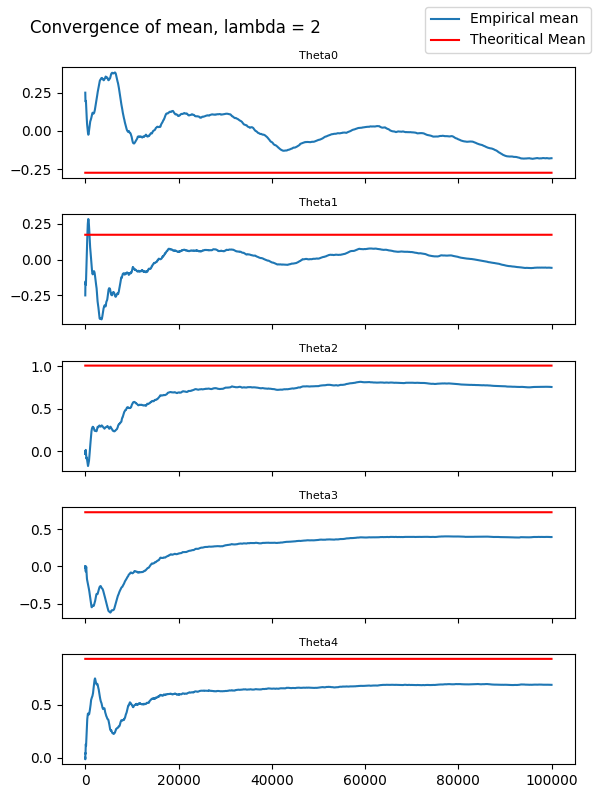

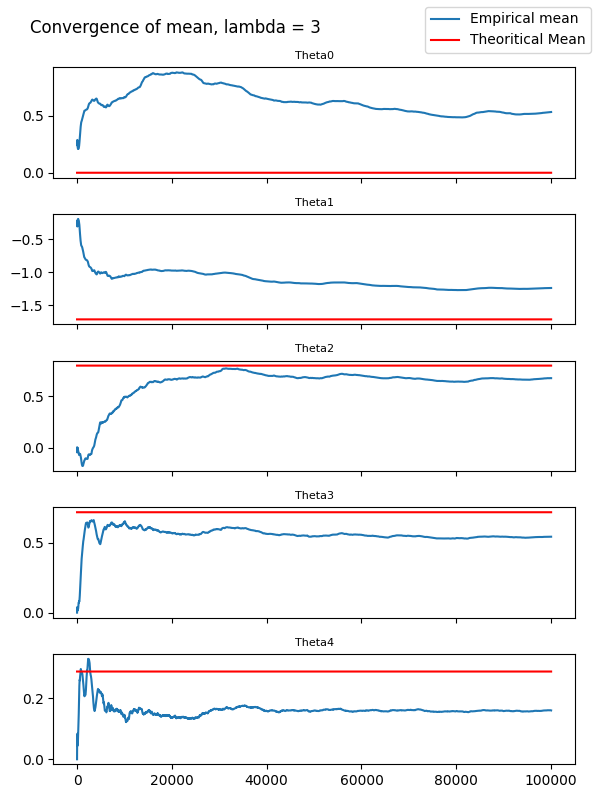

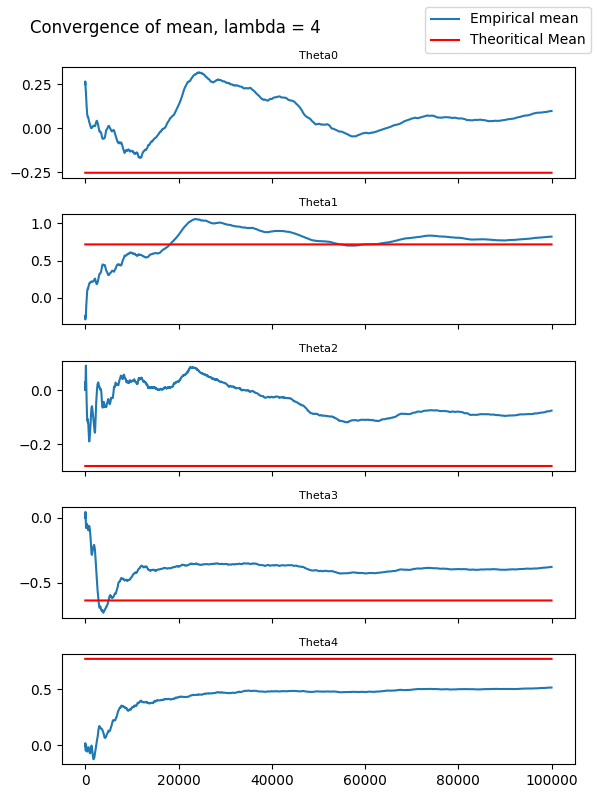

In [34]:
Lambdas = np.arange(1,5)
niter = 1e5
T = 5
x = np.arange(1,niter+2)

for L in Lambdas:
    Y = Computation_Y(T,Lambda)
    _,mu_tilde = ComputeMeans(T,Lambda,Y)
    sim_theta,sim_theta_tilde,*_ = MetropolisHastings(T,Lambda,Y,niter=niter)
    fig,Axes = plt.subplots(T,1,figsize=(6,8),sharex=True,num=int(L))
    
    for i in range(T):
        res = np.cumsum(sim_theta_tilde,axis=0)
        res = res[:,i]/x
        ax = Axes[i]
        ax.plot(res,label="Empirical mean" if i==0 else "")
        ax.plot(mu_tilde[i]*np.ones(int(niter)),'r',label="Theoritical Mean" if i==0 else "")
        ax.set_title(f"Theta{i}",fontsize=8)

    fig.suptitle(f"Convergence of mean, lambda = {L}", x=0.3)
    fig.tight_layout()
    fig.legend()
    plt.show()